In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.datasets import load_iris

In [2]:
data = pd.read_csv("air_bnb.csv")

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [4]:
del data['id']
del data['name']
del data['host_id']
del data['host_name']

In [5]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...
22547,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [6]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [7]:
#melihat data kosong
np.where(np.isnan(data["reviews_per_month"]))

(array([    7,    44,    47, ..., 22549, 22550, 22551]),)

In [8]:
#mengisi data kosong dengan 0
data["reviews_per_month"] = data["reviews_per_month"].fillna(0)

In [9]:
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.00000,22552.000000,22552.000000
mean,52.509824,13.406107,67.143668,7.157059,17.840679,0.93845,1.918233,79.852829
std,0.030825,0.057964,220.266210,40.665073,36.769624,1.43598,3.667257,119.368162
min,52.345803,13.103557,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,52.489065,13.375411,30.000000,2.000000,1.000000,0.06000,1.000000,0.000000
50%,52.509079,13.416779,45.000000,2.000000,5.000000,0.34000,1.000000,4.000000
75%,52.532669,13.439259,70.000000,4.000000,16.000000,1.18000,1.000000,129.000000
max,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.67000,45.000000,365.000000


In [10]:
data.groupby("room_type").count()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,
Entire home/apt,10722,10722,10722,10722,10722,10722,10722,8864,10722,10722,10722
Private room,11534,11534,11534,11534,11534,11534,11534,9561,11534,11534,11534
Shared room,296,296,296,296,296,296,296,219,296,296,296


In [11]:
import seaborn as sns
sns.set_style("whitegrid")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

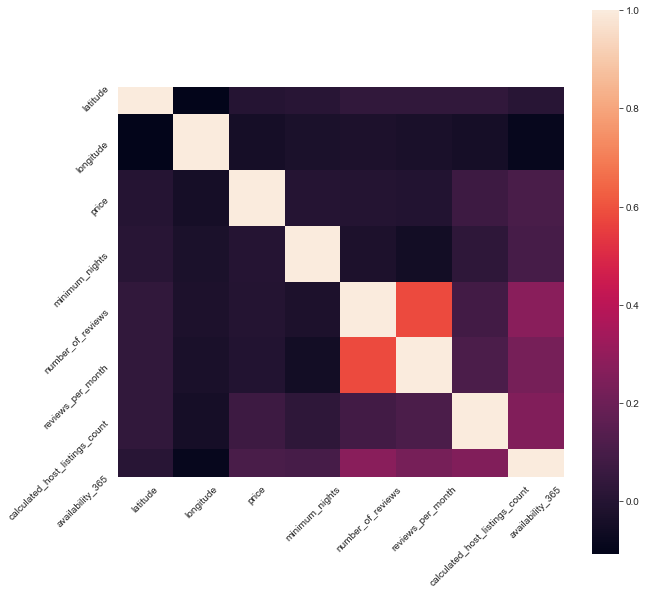

In [12]:
corr = data.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, vmax=1, square=True)
#ax.set_xticklabels(rotation=30)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [13]:
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.107228,0.002181,0.011863,0.037973,0.038577,0.039785,0.012116
longitude,-0.107228,1.000000,-0.042662,-0.026450,-0.020905,-0.032989,-0.044122,-0.086532
price,0.002181,-0.042662,1.000000,0.003626,-0.001235,-0.007680,0.073244,0.105959
minimum_nights,0.011863,-0.026450,0.003626,1.000000,-0.021685,-0.053633,0.027285,0.099350
number_of_reviews,0.037973,-0.020905,-0.001235,-0.021685,1.000000,0.584285,0.085898,0.277621
reviews_per_month,0.038577,-0.032989,-0.007680,-0.053633,0.584285,1.000000,0.110234,0.227286
calculated_host_listings_count,0.039785,-0.044122,0.073244,0.027285,0.085898,0.110234,1.000000,0.252414
availability_365,0.012116,-0.086532,0.105959,0.099350,0.277621,0.227286,0.252414,1.000000


In [14]:
# sns.countplot(x = 'reviews_per_month', data = data)

In [15]:
list_feature = ['number_of_reviews','reviews_per_month']
data_feature = data[list_feature]

In [16]:
data_feature

,number_of_reviews,reviews_per_month
0,118,3.76
1,6,1.42
2,143,1.25
3,25,0.39
4,197,1.75
...,...,...
22547,0,0.00
22548,0,0.00
22549,0,0.00
22550,0,0.00


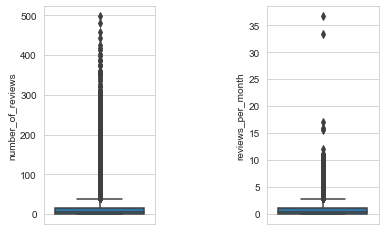

In [17]:
#melihat outliner
f, axes = plt.subplots(1, 2)
sns.boxplot(y=data_feature['number_of_reviews'], ax = axes[0])
sns.boxplot(y=data_feature['reviews_per_month'], ax = axes[1])
plt.subplots_adjust(wspace=1)

In [18]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_feature, data["room_type"], test_size=0.20, random_state=100)

# Classification menggunakan Naive Bayes

In [19]:
#kalsifikasi menggunakan Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
result = clf.predict(X_test)

In [21]:
result

array(['Private room', 'Private room', 'Entire home/apt', ...,
       'Private room', 'Private room', 'Entire home/apt'], dtype='<U15')

In [22]:
clf.score(X_test, y_test)*100

54.045666149412554

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test, result))

                 precision    recall  f1-score   support

Entire home/apt       0.55      0.20      0.29      2094
   Private room       0.54      0.86      0.66      2353
    Shared room       0.00      0.00      0.00        64

       accuracy                           0.54      4511
      macro avg       0.36      0.35      0.32      4511
   weighted avg       0.53      0.54      0.48      4511



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classification menggunakan Decision Tree

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Klasifikasi menggunakan Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [26]:
hasil2 = clf.predict(X_test)

In [27]:
hasil2

array(['Entire home/apt', 'Private room', 'Private room', ...,
       'Private room', 'Entire home/apt', 'Entire home/apt'], dtype='<U15')

In [28]:
clf.score(X_test, y_test)*100

50.055420084238534

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test, hasil2))

                 precision    recall  f1-score   support

Entire home/apt       0.48      0.58      0.52      2094
   Private room       0.53      0.44      0.48      2353
    Shared room       0.00      0.00      0.00        64

       accuracy                           0.50      4511
      macro avg       0.34      0.34      0.34      4511
   weighted avg       0.50      0.50      0.49      4511



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Clustering 1

In [30]:
k = 3
centroids = {
    i+1 : [np.random.randint(0,10), np.random.randint(0,10)]
    for i in range(k)
}

<function matplotlib.pyplot.show(*args, **kw)>

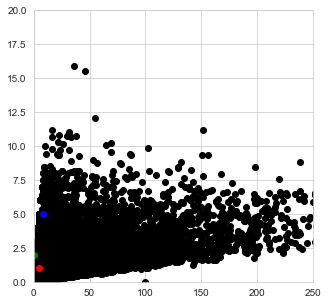

In [31]:
fig = plt.figure(figsize=(5,5))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color = 'k')
colmap = {1: 'r' , 2: 'g' , 3: 'b'}
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,250)
plt.ylim(0,20)
plt.show

      neighbourhood_group             neighbourhood   latitude  longitude  \
0                   Mitte           Brunnenstr. Süd  52.534537  13.402557   
1                  Pankow  Prenzlauer Berg Nordwest  52.548513  13.404553   
2                  Pankow   Prenzlauer Berg Südwest  52.534996  13.417579   
3  Tempelhof - Schöneberg           Schöneberg-Nord  52.498855  13.349065   
4                  Pankow            Helmholtzplatz  52.543157  13.415091   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     60               4                118  2018-10-28   
1     Private room     17               2                  6  2018-10-01   
2  Entire home/apt     90              62                143  2017-03-20   
3     Private room     26               5                 25  2018-08-16   
4     Private room     42               2                197  2018-11-04   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0     

<function matplotlib.pyplot.show(*args, **kw)>

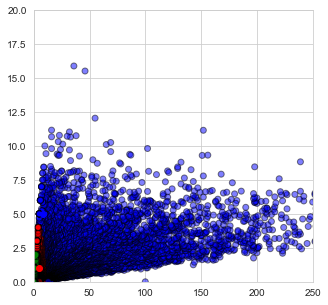

In [32]:
def assigment(data, centroids):
    for i in centroids.keys() :
        data['distance_from_{}'.format(i)] = (
            np.sqrt(
                (data['number_of_reviews'] - centroids[i][0]) ** 2
                + (data['reviews_per_month'] - centroids[i][1]) ** 2
            )
        )
    centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:, centroids_distance_cols].idxmin(axis = 1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data['color'] = data['closest'].map(lambda x: colmap[x])

    return data

data = assigment(data,centroids)
print(data.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color = data['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,250)
plt.ylim(0,20)
plt.show

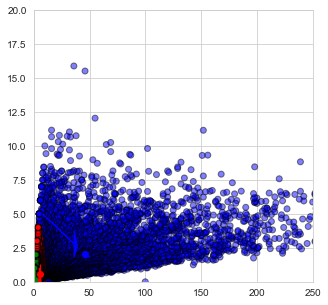

In [33]:
import copy

old_centroids = copy.deepcopy(centroids)
def update(k) :
    for i in centroids.keys() :
        centroids[i][0] = np.mean(data[data['closest'] == i ]['number_of_reviews'])
        centroids[i][1] = np.mean(data[data['closest'] == i ]['reviews_per_month'])
    
    return k

centroids = update(centroids)

fig = plt.figure(figsize = (5,5))

ax = plt.axes()
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color = data['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,250)
plt.ylim(0,20)

for i in old_centroids.keys() :
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75

    ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc=colmap[i], ec = colmap[i])

plt.show()

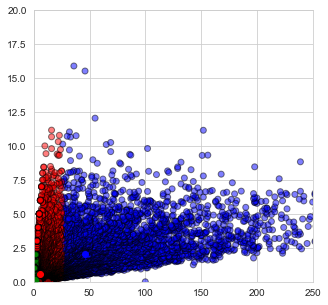

In [34]:
data = assigment(data,centroids)

fig = plt.figure(figsize = (5,5))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color = data['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,250)
plt.ylim(0,20)
plt.show()

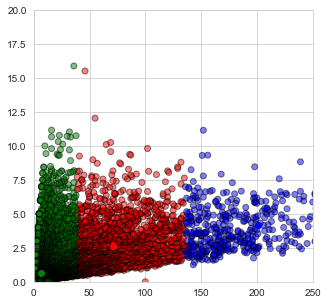

In [35]:
while True :
    closest_centroids = data['closest'].copy(deep=True)
    centroids = update(centroids)
    data = assigment(data,centroids)

    if closest_centroids.equals(data['closest']) :
        break

fig = plt.figure(figsize = (5,5))
plt.scatter(data['number_of_reviews'], data['reviews_per_month'], color = data['color'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,250)
plt.ylim(0,20)
plt.show()

# Clustering 2

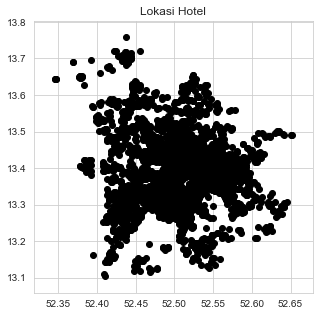

In [40]:
fig = plt.figure(figsize=(5, 5))
plt.title('Lokasi Hotel')
plt.scatter(data['latitude'], data['longitude'], color='k')

In [41]:
#Memilih titik awal centroid sebanyak k
def pilih_centroids():
  k = 4
  inicentroid = {
      i + 1 : [random.choices(data['latitude']),random.choices(data['longitude'])]
      for i in range(k)
  }
  return inicentroid

In [42]:
#Mengelompokkan data bedasarkan jarak terdekatnya dengan masing-masing centroid
def pengelompokan(df, centroids):
    for i in centroids.keys():
        df['jarak_{}'.format(i)] = (np.sqrt((df['latitude'] - centroids[i][0]) ** 2 + (df['longitude'] - centroids[i][1]) ** 2))
    
    jarak_centroid = ['jarak_{}'.format(i) for i in centroids.keys()]
    data['lokasi'] = data.loc[:, jarak_centroid].idxmin(axis=1)
    data['lokasi'] = data['lokasi'].map(lambda x: int(x.lstrip('jarak_')))
    data['warna'] = data['lokasi'].map(lambda x: colmap[x])

    return data

In [43]:
#Menentukan titik centroid baru
def centroidBaru(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(data[data['lokasi'] == i]['latitude'])
        centroids[i][1] = np.mean(data[data['lokasi'] == i]['longitude'])
    return k

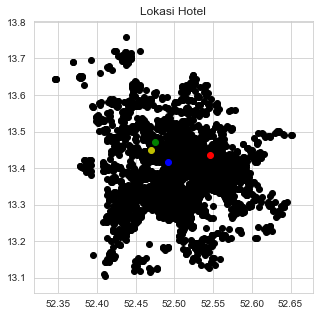

In [44]:
#titik awal centroid
centroids = pilih_centroids()
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['latitude'], data['longitude'], color='k')
colmap = {1: 'b', 2: 'y', 3: 'r', 4: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.title('Lokasi Hotel')
plt.show()

In [45]:
data = pengelompokan(data, centroids)

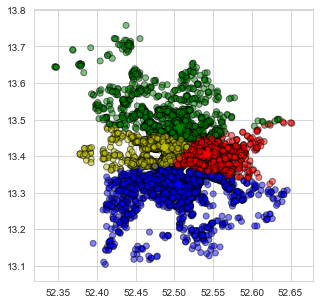

In [46]:
#Mewarnai data sesuai pengelompokannya hingga nilai centroid selalu diperbarui dan tidak berubah lagi
cluster = []
while True:
    centroid_terdekat = data['lokasi'].copy(deep=True)
    centroids = centroidBaru(centroids)
    data = pengelompokan(data, centroids)
#     cluster.append(df)
#     df['hasilcluster'] = cluster
    
    if centroid_terdekat.equals(data['lokasi']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['latitude'], data['longitude'], color=data['warna'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 1)
# plt.ylim(0, 1)

plt.show()